# 理財機器人回測－單因子策略

- Made by Alex Chiang
- 作者 江祐宏
- 2021/6/12

In [1]:
# 傳入回測模組
from module.backtest import Backtest

# 資料夾相對路徑
import os
path = os.getcwd()

### 策略回測
可以自行調整參數，套件內部有參數的詳細說明（建議看完）

In [2]:
Backtest_skew = Backtest(strategy = 'skew2',
                         beginning_money = 100, 
                         start_day = '2006-01-01', 
                         feature_period = 240, 
                         selected_from_last = False,
                         n_stock = 5, 
                         max_percentage = 0.2, 
                         rebalance = 240, 
                         dynamic_rebalance = False, 
                         stop_loss = 0.3)

### 繪製結果

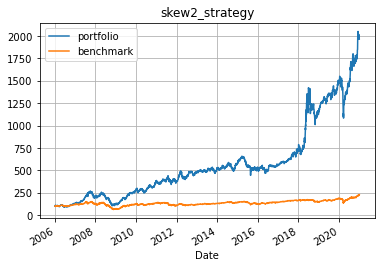

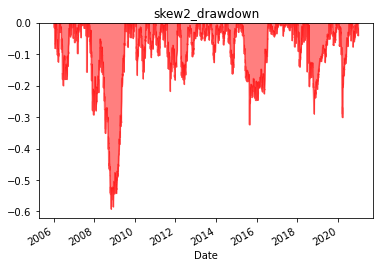

In [3]:
Backtest_skew.show_portfolio()

### 績效評估
可參考套件內部說明，印出 9 種結果

In [4]:
Backtest_skew.show_index(index = 'Sharpe_ratio')

 <Strategy> 
 Sharpe_ratio : 0.91 
 
 <Benchmark> 
 Sharpe_ratio : 0.3113


In [5]:
Backtest_skew.show_index(index = 'All')

 <Strategy> 
 Max_drawdown: 0.5923 
 Accumulation_return: 18.6655 
 Annual_return: 0.2194 
 Annual_volatility: 0.2411 
 Neg_annual_volatility: 0.1472 
 Sharpe_ratio: 0.91 
 Sortino_ratio: 1.4906 
 Calmar_ratio: 0.3705 
 
 <Benchmark> 
 Max_drawdown: 0.56 
 Accumulation_return: 1.2799 
 Annual_return: 0.0564 
 Annual_volatility: 0.1812 
 Neg_annual_volatility: 0.1177 
 Sharpe_ratio: 0.3113 
 Sortino_ratio: 0.4793 
 Calmar_ratio: 0.1007


### 收益細節

In [6]:
Backtest_skew.portfolio_benchmark

,portfolio,benchmark
Date,,
2006-01-02,100.000000,100.000000
2006-01-03,102.348860,102.007254
2006-01-04,102.847389,102.389021
2006-01-05,107.167296,103.834838
2006-01-06,106.258473,103.601935
...,...,...
2020-12-25,1991.611287,221.778720
2020-12-28,2006.075150,224.125510
2020-12-29,1999.784068,223.954967


---

### 優質策略操作
- 參數為 240 天的 Max alpha
- 60 天靜態再平衡
- 購買 5 檔平均配置
- 不做動態停損再平衡

In [7]:
Backtest_alpha = Backtest(strategy = 'alpha',
                          beginning_money = 100,  
                          start_day = '2006-01-01', 
                          feature_period = 240, 
                          selected_from_last = False,
                          n_stock = 5, 
                          max_percentage = 0.2, 
                          rebalance = 60, 
                          dynamic_rebalance = False, 
                          stop_loss = 0.3)

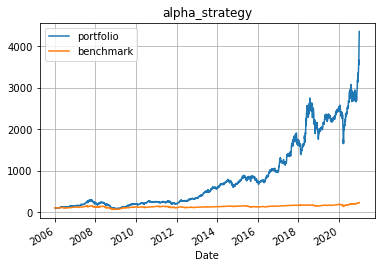

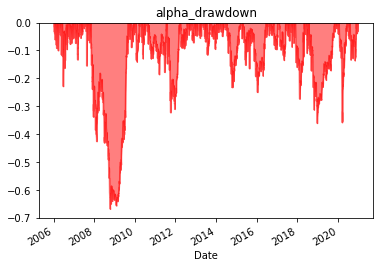

In [8]:
Backtest_alpha.show_portfolio()

In [9]:
Backtest_alpha.show_index(index = 'All')

 <Strategy> 
 Max_drawdown: 0.6688 
 Accumulation_return: 42.5968 
 Annual_return: 0.2858 
 Annual_volatility: 0.2993 
 Neg_annual_volatility: 0.1775 
 Sharpe_ratio: 0.9549 
 Sortino_ratio: 1.6105 
 Calmar_ratio: 0.4274 
 
 <Benchmark> 
 Max_drawdown: 0.56 
 Accumulation_return: 1.2799 
 Annual_return: 0.0564 
 Annual_volatility: 0.1812 
 Neg_annual_volatility: 0.1177 
 Sharpe_ratio: 0.3113 
 Sortino_ratio: 0.4793 
 Calmar_ratio: 0.1007


---

### D.I.Y. by yourself

In [10]:
Backtest = Backtest(strategy = 'beta', n_stock = 3, 
                    max_percentage = 1, rebalance = 120)